In [27]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties
import seaborn as sns
from highlight_text import ax_text, fig_text
from PIL import Image
import urllib
import os

In [2]:
df_wc_standings = pd.read_csv("I:/Projects/Skoki Narciarskie listopad_2024/individual_wc_standings.csv", usecols=["Rank","Athlete","Country","Points","Appearances"],delimiter=";")

In [3]:
df_athletes = pd.read_csv("athlete_details_data.csv",usecols=["Ski_jumper_name","Nationality","Date_of_birth"],delimiter=";")

In [4]:
df_wc_standings.head(11)

,Rank,Athlete,Country,Points,Appearances
0,1,KRAFT Stefan,Austria,2149,32
1,2,KOBAYASHI Ryoyu,Japonia,1673,32
2,3,WELLINGER Andreas,Niemcy,1488,32
3,4,HOERL Jan,Austria,1140,29
4,5,PREVC Peter,Słowenia,1071,30
5,6,HAYBOECK Michael,Austria,882,30
6,7,FORFANG Johann Andre,Norwegia,867,32
7,8,LINDVIK Marius,Norwegia,854,32
8,9,KOS Lovro,Słowenia,792,28
9,10,PASCHKE Pius,Niemcy,778,32


In [5]:
df_athletes.head(10)

,Ski_jumper_name,Nationality,Date_of_birth
0,Stefan KRAFT,Austria,1993-05-13
1,Ryoyu KOBAYASHI,Japonia,1996-11-08
2,Andreas WELLINGER,Niemcy,1995-08-28
3,Jan HOERL,Austria,1998-10-16
4,Peter PREVC,Słowenia,1992-09-20
5,Michael HAYBOECK,Austria,1991-03-05
6,Johann Andre FORFANG,Norwegia,1995-07-04
7,Marius LINDVIK,Norwegia,1998-06-27
8,Lovro KOS,Słowenia,1999-07-23
9,Pius PASCHKE,Niemcy,1990-05-20


In [6]:
name_split = df_athletes["Ski_jumper_name"].str.rsplit(" ",n=1,expand=True)
df_athletes["Athlete"] = name_split[1] + ' ' + name_split[0]

In [7]:
df_athletes.drop(columns="Ski_jumper_name",inplace=True)

In [8]:
df_athletes.head(10)

,Nationality,Date_of_birth,Athlete
0,Austria,1993-05-13,KRAFT Stefan
1,Japonia,1996-11-08,KOBAYASHI Ryoyu
2,Niemcy,1995-08-28,WELLINGER Andreas
3,Austria,1998-10-16,HOERL Jan
4,Słowenia,1992-09-20,PREVC Peter
5,Austria,1991-03-05,HAYBOECK Michael
6,Norwegia,1995-07-04,FORFANG Johann Andre
7,Norwegia,1998-06-27,LINDVIK Marius
8,Słowenia,1999-07-23,KOS Lovro
9,Niemcy,1990-05-20,PASCHKE Pius


In [9]:
df_wc_standings.loc[~df_wc_standings["Athlete"].isin(df_athletes['Athlete'])]

,Rank,Athlete,Country,Points,Appearances


In [10]:
df_wc_standings

,Rank,Athlete,Country,Points,Appearances
0,1,KRAFT Stefan,Austria,2149,32
1,2,KOBAYASHI Ryoyu,Japonia,1673,32
2,3,WELLINGER Andreas,Niemcy,1488,32
3,4,HOERL Jan,Austria,1140,29
4,5,PREVC Peter,Słowenia,1071,30
...,...,...,...,...,...
62,63,URLAUB Andrew,USA,4,12
63,64,CAMPREGHER Andrea,Włochy,3,15
64,64,IPCIOGLU Fatih Arda,Turcja,3,9
65,64,SATO Keiichi,Japonia,3,6


In [11]:
df_wc_standings["Points_per_wc"] = (df_wc_standings["Points"]/df_wc_standings["Appearances"]).round(2)

In [12]:
df_wc_standings

,Rank,Athlete,Country,Points,Appearances,Points_per_wc
0,1,KRAFT Stefan,Austria,2149,32,67.16
1,2,KOBAYASHI Ryoyu,Japonia,1673,32,52.28
2,3,WELLINGER Andreas,Niemcy,1488,32,46.50
3,4,HOERL Jan,Austria,1140,29,39.31
4,5,PREVC Peter,Słowenia,1071,30,35.70
...,...,...,...,...,...,...
62,63,URLAUB Andrew,USA,4,12,0.33
63,64,CAMPREGHER Andrea,Włochy,3,15,0.20
64,64,IPCIOGLU Fatih Arda,Turcja,3,9,0.33
65,64,SATO Keiichi,Japonia,3,6,0.50


In [13]:
df_wc_age = df_wc_standings.merge(df_athletes,on="Athlete", how="left",suffixes=("_wc","_det"))

In [14]:
df_wc_age.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 67 entries, 0 to 66
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Rank           67 non-null     int64  
 1   Athlete        67 non-null     object 
 2   Country        67 non-null     object 
 3   Points         67 non-null     int64  
 4   Appearances    67 non-null     int64  
 5   Points_per_wc  67 non-null     float64
 6   Nationality    67 non-null     object 
 7   Date_of_birth  67 non-null     object 
dtypes: float64(1), int64(3), object(4)
memory usage: 4.7+ KB


In [15]:
df_wc_age["Date_of_birth"] = pd.to_datetime(df_wc_age["Date_of_birth"])

In [16]:
last_wc_date = pd.to_datetime("2024-03-24")

In [17]:
last_wc_date.year - df_wc_age["Date_of_birth"].dt.year

0     31
1     28
2     29
3     26
4     32
      ..
62    23
63    23
64    27
65    27
66    37
Name: Date_of_birth, Length: 67, dtype: int64

In [18]:
df_wc_age["Date_of_birth"].dt.month

0      5
1     11
2      8
3     10
4      9
      ..
62     4
63     6
64     9
65     7
66     5
Name: Date_of_birth, Length: 67, dtype: int64

In [19]:
def calculate_age(start_date, end_date):
    year_diff = end_date.year - start_date.dt.year
    
    has_birthday_occurred = (start_date.dt.month <= end_date.month) & (start_date.dt.day <= end_date.day)

    age = year_diff - (~has_birthday_occurred).astype(int)
    
    return age

In [20]:
df_wc_age["Age"] = calculate_age(df_wc_age["Date_of_birth"],last_wc_date)

In [21]:
df_wc_age

,Rank,Athlete,Country,Points,Appearances,Points_per_wc,Nationality,Date_of_birth,Age
0,1,KRAFT Stefan,Austria,2149,32,67.16,Austria,1993-05-13,30
1,2,KOBAYASHI Ryoyu,Japonia,1673,32,52.28,Japonia,1996-11-08,27
2,3,WELLINGER Andreas,Niemcy,1488,32,46.50,Niemcy,1995-08-28,28
3,4,HOERL Jan,Austria,1140,29,39.31,Austria,1998-10-16,25
4,5,PREVC Peter,Słowenia,1071,30,35.70,Słowenia,1992-09-20,31
...,...,...,...,...,...,...,...,...,...
62,63,URLAUB Andrew,USA,4,12,0.33,USA,2001-04-12,22
63,64,CAMPREGHER Andrea,Włochy,3,15,0.20,Włochy,2001-06-20,22
64,64,IPCIOGLU Fatih Arda,Turcja,3,9,0.33,Turcja,1997-09-28,26
65,64,SATO Keiichi,Japonia,3,6,0.50,Japonia,1997-07-27,26


In [22]:
df_wc_age["IsHighlighted"] = ((df_wc_age["Rank"] == 42) | (df_wc_age["Rank"] == 35) | (df_wc_age["Rank"] == 36) |
(df_wc_age["Rank"] == 2) | (df_wc_age["Rank"] == 39) | (df_wc_age["Rank"] == 11) |
(df_wc_age["Rank"] == 1) | (df_wc_age["Rank"] == 5) | (df_wc_age["Rank"] == 12) |
(df_wc_age["Rank"] == 25) | (df_wc_age["Rank"] == 52) | (df_wc_age["Rank"] == 58))

In [23]:
df_wc_age.head()

,Rank,Athlete,Country,Points,Appearances,Points_per_wc,Nationality,Date_of_birth,Age,IsHighlighted
0,1,KRAFT Stefan,Austria,2149,32,67.16,Austria,1993-05-13,30,True
1,2,KOBAYASHI Ryoyu,Japonia,1673,32,52.28,Japonia,1996-11-08,27,True
2,3,WELLINGER Andreas,Niemcy,1488,32,46.50,Niemcy,1995-08-28,28,False
3,4,HOERL Jan,Austria,1140,29,39.31,Austria,1998-10-16,25,False
4,5,PREVC Peter,Słowenia,1071,30,35.70,Słowenia,1992-09-20,31,True


In [28]:
personal_path = 'C:/Users/Paweł/AppData/Local/Microsoft/Windows/Fonts/'

font_path = f"{personal_path}Karla-Bold.ttf"
karla_bold = FontProperties(fname=font_path)

font_path = f"{personal_path}KarlaRegular.ttf"
karla_regular = FontProperties(fname=font_path)

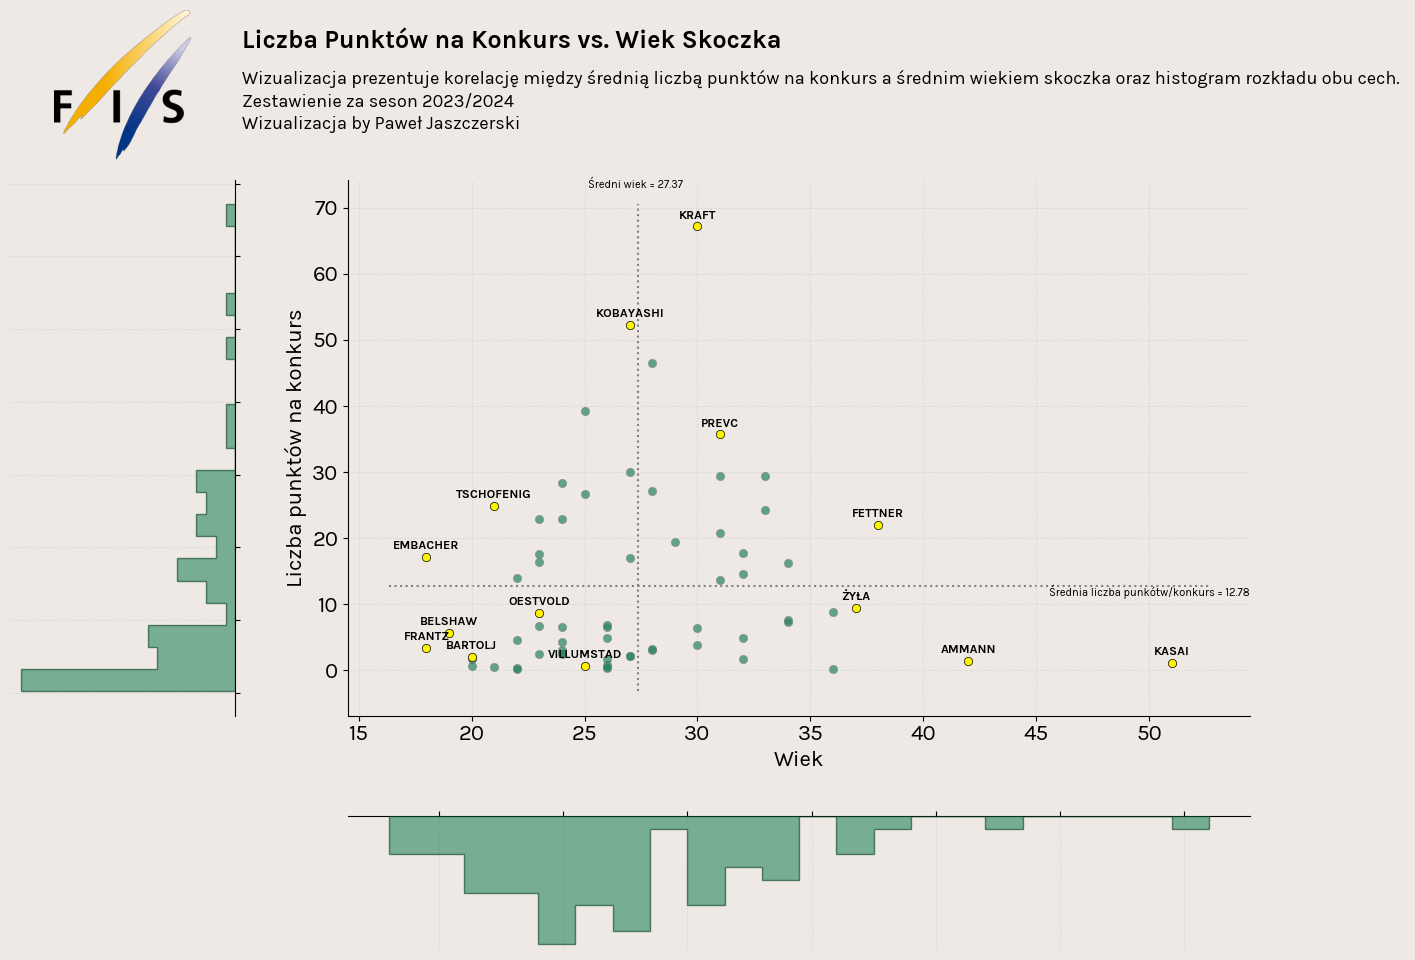

In [44]:
fig, ax = plt.subplots(2,2, figsize=(16,10), facecolor="#EEE9E5", gridspec_kw={'width_ratios':[1,4],
                                                          'height_ratios': [4,1],
                                                          'hspace': 0.3,
                                                          'wspace': 0.2})
# Define axes

ax_left = ax[0, 0]
ax_main = ax[0, 1]
ax_bottom = ax[1, 1]
ax[1,0].axis("off")

ax_main.set_facecolor("#EEE9E5")
ax_left.set_facecolor("#EEE9E5")
ax_bottom.set_facecolor("#EEE9E5")

ax_main.spines["top"].set_visible(False)
ax_main.spines["right"].set_visible(False)
ax_left.spines["left"].set_visible(False)
ax_left.spines["top"].set_visible(False)
ax_left.spines["bottom"].set_visible(False)
ax_bottom.spines["left"].set_visible(False)
ax_bottom.spines["right"].set_visible(False)
ax_bottom.spines["bottom"].set_visible(False)


age = df_wc_age.loc[df_wc_age["IsHighlighted"] == False,"Age"].values
points = df_wc_age.loc[df_wc_age["IsHighlighted"] == False,"Points_per_wc"].values
age_highlighted = df_wc_age.loc[df_wc_age["IsHighlighted"] == True,"Age"].values
points_highlighted = df_wc_age.loc[df_wc_age["IsHighlighted"] == True,"Points_per_wc"].values
athlete_highlighted = np.array(df_wc_age.loc[df_wc_age["IsHighlighted"] == True,"Athlete"].values)
athlete_highlighted_ln = [name.split()[0] for name in athlete_highlighted]


ax_main.scatter(
    age,
    points,
    c="#26855d",
    alpha=0.7,
    edgecolors='gray',
    linewidths=0.5,
    zorder=2)

ax_main.scatter(
    age_highlighted,
    points_highlighted,
    c="#fff300",
    alpha=1,
    edgecolors='#000000',
    linewidths=0.5,
    zorder=3)


for idx, name in enumerate(athlete_highlighted_ln):
    X = age_highlighted[idx]
    Y = points_highlighted[idx]
    y_pos = 7.5
    x_pos = 0
    text = ax_main.annotate(
        xy = (X,Y),
        text = athlete_highlighted_ln[idx],
        ha = "center",
        va = "center",
        xytext = (x_pos, y_pos),
        textcoords = "offset points",
        font=karla_bold,
        fontsize = 9
        )


avg_points = df_wc_age['Points_per_wc'].mean()
ax_main.plot(
    [ax_main.get_xlim()[0], ax_main.get_xlim()[1]],
    [avg_points, avg_points],
    ls = ':',
    color = "grey",
    zorder = 1
)

avg_age = df_wc_age['Age'].mean()
ax_main.plot(
    [avg_age, avg_age],
    [ax_main.get_ylim()[0], ax_main.get_ylim()[1]],
    ls = ':',
    color = "grey",
    zorder = 2
)

ax_main.grid(True, ls=":", color="lightgray", zorder=4)
ax_left.grid(True, ls=":", color="lightgray", zorder=4)
ax_bottom.grid(True, ls=":", color="lightgray", zorder=4)

# Histogram on the left
ax_left.hist(
    df_wc_age["Points_per_wc"],
    bins=22,
    histtype='stepfilled', 
    orientation='horizontal', 
    alpha=0.6,
    color='#26855d',
    edgecolor="#043e1a",
    linewidth=1,
    zorder=3
    )

ax_left.invert_xaxis()
ax_left.set_xticks([])
ax_left.yaxis.set_ticks_position("right")
ax_left.set_yticklabels([])

# Histogram at the bottom
ax_bottom.hist(
    df_wc_age["Age"],
    bins=22, 
    histtype='stepfilled', 
    orientation='vertical', 
    alpha = 0.6,
    color='#26855d',
    edgecolor="#043e1a",
    linewidth=1,
    zorder=3
    )


ax_bottom.invert_yaxis()
ax_bottom.set_yticks([])
ax_bottom.xaxis.set_ticks_position("top")
ax_bottom.set_xticklabels([])

# Decorations for the main plot
ax_main.set(xlabel='Wiek', ylabel='Liczba punktów na konkurs')
for item in ([ax_main.xaxis.label, ax_main.yaxis.label] + ax_main.get_xticklabels() + ax_main.get_yticklabels()):
    item.set_fontproperties(karla_regular)
    item.set_fontsize(16)
    

fis_logo = Image.open("I:/Projects/Skoki Narciarskie Sezon 2023_2024/FIS_Ski.png")
fis_ax = fig.add_axes([0.12,0.9,0.15,0.15], zorder=1)
fis_ax.imshow(fis_logo)
fis_ax.axis("off")

fig_text(
    x = 0.27, y = 1.03,
    s = "Liczba Punktów na Konkurs vs. Wiek Skoczka",
    fontsize = 18, color="black", font=karla_bold
)

fig_text(
    x= 0.27, y = 0.99,
    s = "Wizualizacja prezentuje korelację między średnią liczbą punktów na konkurs a średnim wiekiem skoczka oraz histogram rozkładu obu cech.\nZestawienie za seson 2023/2024 \nWizualizacja by Paweł Jaszczerski",
    color = "black", fontsize=13, font=karla_regular
)


X2 = avg_age + 2
Y2 = ax_main.get_ylim()[1]
text_2 = ax_main.annotate(
    xy = (X2, Y2),
    text = f"Średni wiek = {np.round(avg_age,2)}",
    ha = "right",
    va = "center",
    xytext = (0, -4),
    textcoords = "offset points",
    fontsize = 8,
    font=karla_regular
)

X3 = ax_main.get_xlim()[1]
Y3 = avg_points
text_3 = ax_main.annotate(
    xy = (X3,Y3),
    text = f"Średnia liczba punkótw/konkurs = {np.round(avg_points,2)}",
    ha = "right",
    va = "center",
    xytext = (0, -4),
    textcoords = "offset points",
    fontsize = 8,
    font=karla_regular
)

#plt.show()

plt.savefig(
    "age_points_corr.jpg",
    facecolor="#EEE9E5",
    bbox_inches="tight",
    edgecolor="none",
    transparent = False
)